<a href="https://colab.research.google.com/github/ykjoy/ML/blob/main/dunnhumby_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# dunnhumby 데이터를 이용한 regression

# 데이터 전처리 (Data Preprocessing)



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_trans = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BA2023/dunnhumby/transaction_data.csv")
df_demo = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BA2023/dunnhumby/hh_demographic.csv")


In [ ]:
display(df_trans.shape) # 행열
display(df_trans.info()) # 데이터타입, null정보등 확인
display(df_trans.isna().sum()) # 결측치 수
display(df_trans.head())

(2595732, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


None

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [ ]:
display(df_demo.shape) # 행열
display(df_demo.info()) # 데이터타입, null정보등 확인
display(df_demo.isna().sum()) # 결측치 수
display(df_demo.head())

(801, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    object
 7   household_key        801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


None

AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
household_key          0
dtype: int64

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


## 두개의 파일 merge
(801 households / 1427303 transactions)

In [ ]:
print(len(df_trans.household_key.unique()))
print(len(df_demo.household_key.unique()))

2500
801


In [ ]:
df_two = df_trans.merge(df_demo, how = 'inner', on='household_key')
display(df_two.shape) # 행열
display(df_two.info()) # 데이터타입, null정보등 확인
display(df_two.isna().sum()) # 결측치 수
display(len(df_two.household_key.unique()))
display(df_two.head())


(1427303, 19)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1427303 entries, 0 to 1427302
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   household_key        1427303 non-null  int64  
 1   BASKET_ID            1427303 non-null  int64  
 2   DAY                  1427303 non-null  int64  
 3   PRODUCT_ID           1427303 non-null  int64  
 4   QUANTITY             1427303 non-null  int64  
 5   SALES_VALUE          1427303 non-null  float64
 6   STORE_ID             1427303 non-null  int64  
 7   RETAIL_DISC          1427303 non-null  float64
 8   TRANS_TIME           1427303 non-null  int64  
 9   WEEK_NO              1427303 non-null  int64  
 10  COUPON_DISC          1427303 non-null  float64
 11  COUPON_MATCH_DISC    1427303 non-null  float64
 12  AGE_DESC             1427303 non-null  object 
 13  MARITAL_STATUS_CODE  1427303 non-null  object 
 14  INCOME_DESC          1427303 non-null  object 
 15

None

household_key          0
BASKET_ID              0
DAY                    0
PRODUCT_ID             0
QUANTITY               0
SALES_VALUE            0
STORE_ID               0
RETAIL_DISC            0
TRANS_TIME             0
WEEK_NO                0
COUPON_DISC            0
COUPON_MATCH_DISC      0
AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
dtype: int64

801

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1520,1,0.0,0.0,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1520,1,0.0,0.0,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1520,1,0.0,0.0,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1520,1,0.0,0.0,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1520,1,0.0,0.0,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown


## 데이터 기초 통계

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
# pd.reset_option('display.float_format')
df_two.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,1427303.00,1427303.00,1427303.00,1427303.00,1427303.00,1427303.00,1427303.00,1427303.00,1427303.00,1427303.00,1427303.00,1427303.00
mean,1270.91,34150426426.27,394.91,2952597.96,114.86,3.15,3352.29,-0.53,1547.34,57.10,-0.02,-0.00
std,741.39,4680249464.50,186.83,3887442.82,1252.14,4.25,9243.14,1.23,385.57,26.69,0.23,0.04
min,1.00,26984896261.00,1.00,25671.00,0.00,0.00,1.00,-130.02,0.00,1.00,-55.93,-4.05
25%,631.00,30580421173.00,239.00,918663.50,1.00,1.29,333.00,-0.69,1258.00,35.00,0.00,0.00
50%,1260.00,32895483199.00,399.00,1029743.00,1.00,2.09,375.00,0.00,1559.00,58.00,0.00,0.00
75%,1939.00,40128601343.00,556.00,1134533.00,1.00,3.49,424.00,0.00,1831.00,80.00,0.00,0.00
max,2499.00,42302712189.00,711.00,18316298.00,89638.00,840.00,34280.00,0.79,2359.00,102.00,0.00,0.00


In [ ]:
df_two.describe(include="object")

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
count,1427303,1427303,1427303,1427303,1427303,1427303,1427303
unique,6,3,12,5,6,5,4
top,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
freq,520586,641796,348536,925441,446544,546306,937261


## 범주형 변수의 수치화

In [ ]:
print(df_two['AGE_DESC'].unique())
print(df_two['AGE_DESC'].value_counts())

print(df_two['MARITAL_STATUS_CODE'].unique())
print(df_two['MARITAL_STATUS_CODE'].value_counts())

print(df_two['INCOME_DESC'].unique())
print(df_two['INCOME_DESC'].value_counts())

print(df_two['HOMEOWNER_DESC'].unique())
print(df_two['HOMEOWNER_DESC'].value_counts())

print(df_two['HH_COMP_DESC'].unique())
print(df_two['HH_COMP_DESC'].value_counts())

print(df_two['HOUSEHOLD_SIZE_DESC'].unique())
print(df_two['HOUSEHOLD_SIZE_DESC'].value_counts())

print(df_two['KID_CATEGORY_DESC'].unique())
print(df_two['KID_CATEGORY_DESC'].value_counts())

['65+' '55-64' '35-44' '25-34' '45-54' '19-24']
45-54    520586
35-44    386327
25-34    249829
65+      103857
55-64     91498
19-24     75206
Name: AGE_DESC, dtype: int64
['B' 'U' 'A']
A    641796
U    591981
B    193526
Name: MARITAL_STATUS_CODE, dtype: int64
['100-124K' '25-34K' '35-49K' '50-74K' 'Under 15K' '75-99K' '125-149K'
 '15-24K' '250K+' '175-199K' '150-174K' '200-249K']
50-74K       348536
35-49K       278341
75-99K       168837
25-34K       128678
Under 15K    114408
15-24K       104112
125-149K      88004
150-174K      71330
100-124K      59480
250K+         32026
175-199K      25673
200-249K       7878
Name: INCOME_DESC, dtype: int64
['Homeowner' 'Renter' 'Unknown' 'Probable Owner' 'Probable Renter']
Homeowner          925441
Unknown            381332
Renter              83037
Probable Owner      20496
Probable Renter     16997
Name: HOMEOWNER_DESC, dtype: int64
['Single Female' '2 Adults Kids' '1 Adult Kids' 'Single Male'
 '2 Adults No Kids' 'Unknown']
2 Adults No Kids

In [ ]:
age_mapping = lambda x: {'65+': 6, '55-64': 5, '45-54': 4, '35-44': 3, '25-34': 2, '19-24': 1}.get(x, x)
# Use the apply method to create a new column 'AGE_DESC2'
df_two['AGE_DESC2'] = df_two['AGE_DESC'].apply(age_mapping)

df_two['MARITAL_STATUS_CODE2'] = df_two['MARITAL_STATUS_CODE'].apply(lambda x: 1 if x == 'B' else 0)
df_two['HOMEOWNER_DESC2'] = df_two['HOMEOWNER_DESC'].apply(lambda x: 1 if x == 'Homeowner' else 0)

income_mapping = lambda x: {'Under 15K':1, '15-24K':2, '25-34K':3, '35-49K': 4, '50-74K':5,  '75-99K': 6,
                            '100-124K':7, '125-149K':8,'150-174K':9, '175-199K':10,'200-249K':11,'250K+':12 }.get(x, x)
df_two['INCOME_DESCC2'] = df_two['INCOME_DESC'].apply(income_mapping)

size_mapping = lambda x: {'5+': 5, '4': 4, '3': 3, '2': 2, '1': 1}.get(x, x)
df_two['HOUSEHOLD_SIZE_DESC2'] = df_two['HOUSEHOLD_SIZE_DESC'].apply(size_mapping)

kid_mapping = lambda x: {'3+': 4, '2': 3, '1': 2, 'None/Unknown': 1}.get(x, x)
df_two['KID_CATEGORY_DESC2'] = df_two['KID_CATEGORY_DESC'].apply(kid_mapping)


In [ ]:
df_two.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,AGE_DESC2,MARITAL_STATUS_CODE2,HOMEOWNER_DESC2,INCOME_DESCC2,HOUSEHOLD_SIZE_DESC2,KID_CATEGORY_DESC2
count,1427303.00,1427303.00,1427303.00,1427303.00,1427303.00,1427303.00,1427303.00,1427303.00,1427303.00,1427303.00,1427303.00,1427303.00,1427303.00,1427303.00,1427303.00,1427303.00,1427303.00,1427303.00
mean,1270.91,34150426426.27,394.91,2952597.96,114.86,3.15,3352.29,-0.53,1547.34,57.10,-0.02,-0.00,3.43,0.14,0.65,4.95,2.29,1.64
std,741.39,4680249464.50,186.83,3887442.82,1252.14,4.25,9243.14,1.23,385.57,26.69,0.23,0.04,1.22,0.34,0.48,2.42,1.23,1.01
min,1.00,26984896261.00,1.00,25671.00,0.00,0.00,1.00,-130.02,0.00,1.00,-55.93,-4.05,1.00,0.00,0.00,1.00,1.00,1.00
25%,631.00,30580421173.00,239.00,918663.50,1.00,1.29,333.00,-0.69,1258.00,35.00,0.00,0.00,3.00,0.00,0.00,4.00,1.00,1.00
50%,1260.00,32895483199.00,399.00,1029743.00,1.00,2.09,375.00,0.00,1559.00,58.00,0.00,0.00,4.00,0.00,1.00,5.00,2.00,1.00
75%,1939.00,40128601343.00,556.00,1134533.00,1.00,3.49,424.00,0.00,1831.00,80.00,0.00,0.00,4.00,0.00,1.00,6.00,3.00,2.00
max,2499.00,42302712189.00,711.00,18316298.00,89638.00,840.00,34280.00,0.79,2359.00,102.00,0.00,0.00,6.00,1.00,1.00,12.00,5.00,4.00


## Quantity 가 0인 경우 제외

In [ ]:
df_cleaned = df_two[df_two['QUANTITY'] > 0] # quantity =0:  8171 건

In [ ]:
#df_cleaned['DAY'].value_counts().sort_index().head(100)
#df_cleaned[df_cleaned['DAY'].map(df_cleaned['DAY'].value_counts()) < 10].reset_index(drop=True)

# 데이터 시각화

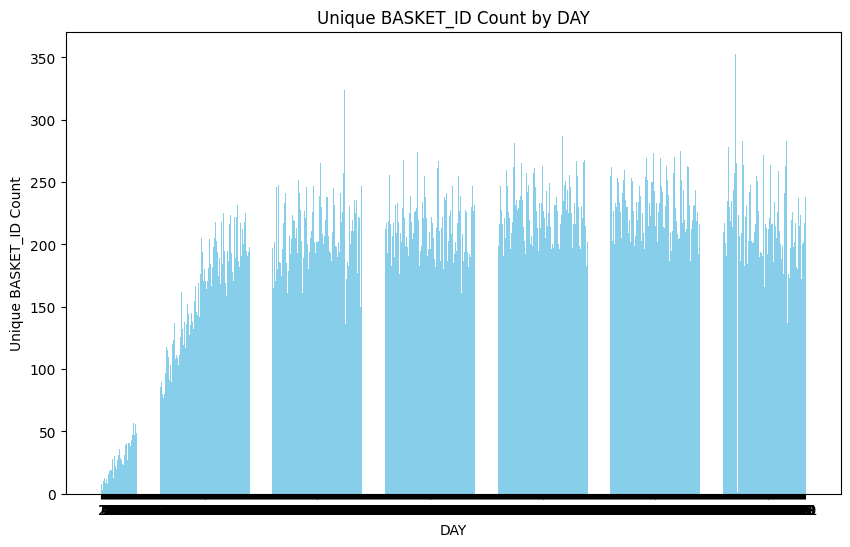

In [ ]:
df_sorted = df_cleaned.copy()
df_sorted.sort_values(by='DAY', inplace=True)
unique_basket_counts = df_sorted.groupby('DAY')['BASKET_ID'].nunique()
# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(unique_basket_counts.index, unique_basket_counts.values, color='skyblue')
plt.xlabel('DAY')
plt.ylabel('Unique BASKET_ID Count')
plt.title('Unique BASKET_ID Count by DAY')
plt.xticks(unique_basket_counts.index)
plt.show()

## DAY, WEEK_NO별 BASKET_ID 갯수

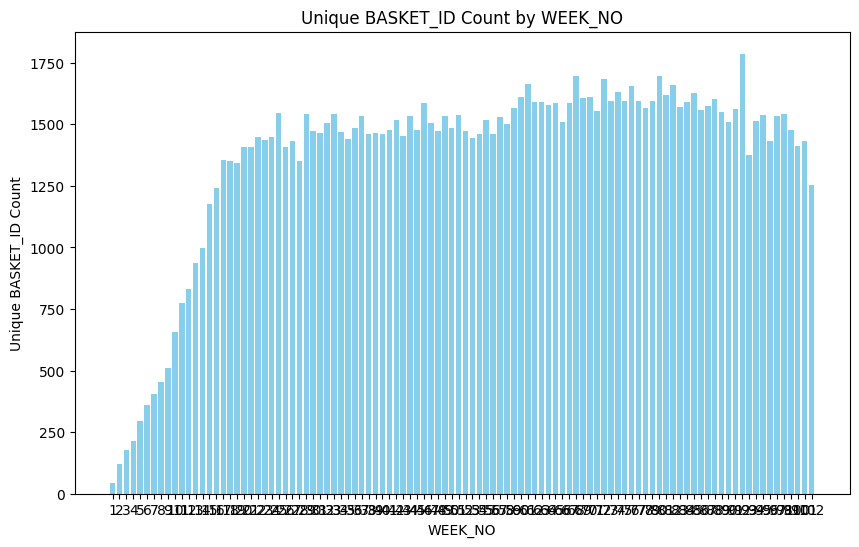

In [ ]:
df_sorted = df_cleaned.copy()
df_sorted.sort_values(by='WEEK_NO', inplace=True)
unique_basket_counts = df_sorted.groupby('WEEK_NO')['BASKET_ID'].nunique()
# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(unique_basket_counts.index, unique_basket_counts.values, color='skyblue')
plt.xlabel('WEEK_NO')
plt.ylabel('Unique BASKET_ID Count')
plt.title('Unique BASKET_ID Count by WEEK_NO')
plt.xticks(unique_basket_counts.index)
plt.show()

## Household별 transaction 건수

<Axes: xlabel='household_key', ylabel='count'>

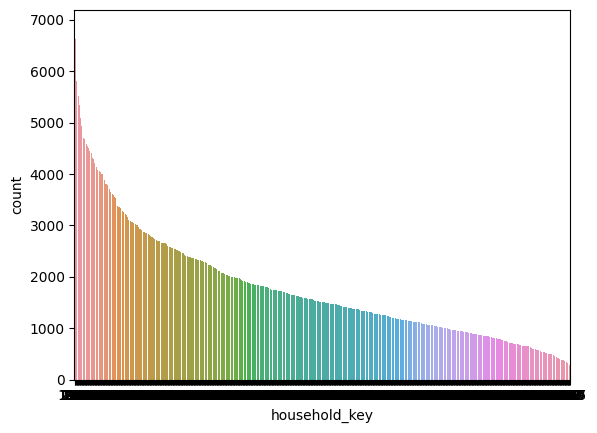

In [ ]:
# 빈도 높은 순으로 막대 정렬
sns.countplot(data = df_two, x = 'household_key', order = df_two['household_key'].value_counts().index)

## Household별 BASKET_ID 건수

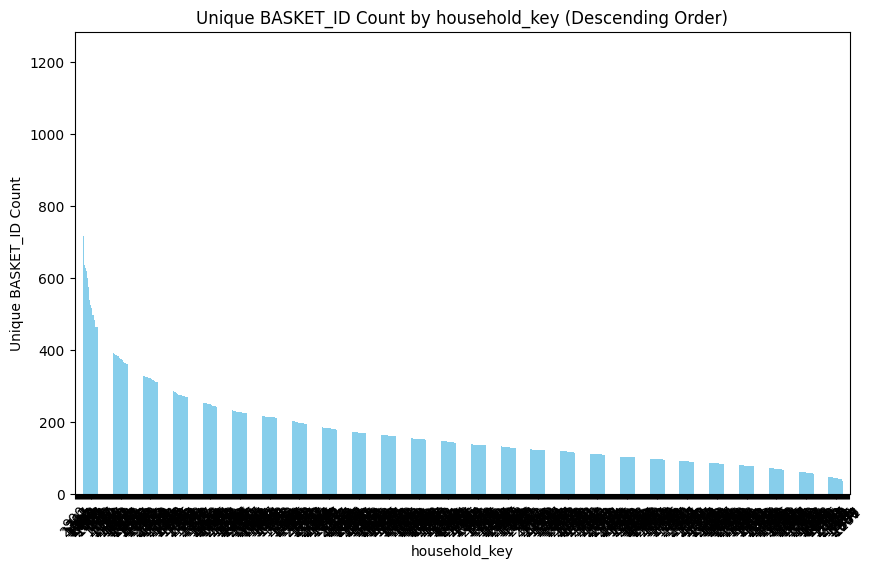

In [ ]:
unique_basket_counts = df_cleaned.groupby('household_key')['BASKET_ID'].nunique()

# nunique 값을 큰 순으로 정렬
unique_basket_counts_sorted = unique_basket_counts.sort_values(ascending=False)

# 정렬된 순서대로 그래프 그리기
plt.figure(figsize=(10, 6))
unique_basket_counts_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('household_key')
plt.ylabel('Unique BASKET_ID Count')
plt.title('Unique BASKET_ID Count by household_key (Descending Order)')
plt.xticks(rotation=45)  # x 축 레이블 회전
plt.show()

In [ ]:
unique_basket_counts_sorted

household_key
900     1223
2337    1207
1795    1136
762      886
1901     838
        ... 
2397      35
1841      32
1257      31
688       28
309       22
Name: BASKET_ID, Length: 801, dtype: int64

## Household별 총메출액 (SALES_VALUE)

<Axes: xlabel='household_key'>

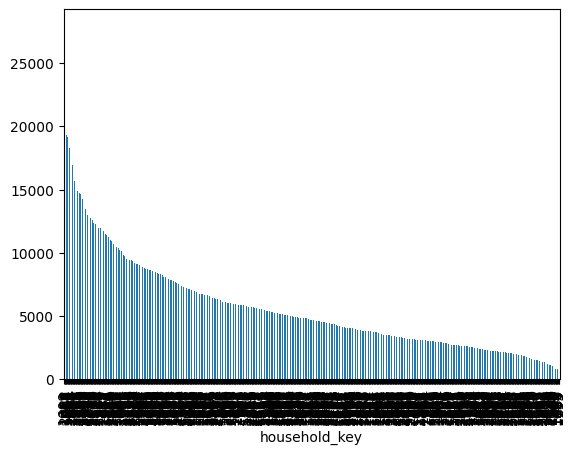

In [ ]:
df_sales = df_cleaned.groupby('household_key')['SALES_VALUE'].sum().sort_values(ascending=False)
df_sales.plot(kind='bar')


In [ ]:
df_sales

household_key
1609   27859.68
2322   23646.92
1453   21661.29
1430   20352.99
718    19299.86
         ...   
1429     818.56
1604     818.41
460      760.45
1135     748.88
593      646.40
Name: SALES_VALUE, Length: 801, dtype: float64

## AGE 별로 총 매출액 (SALES_VALUE)

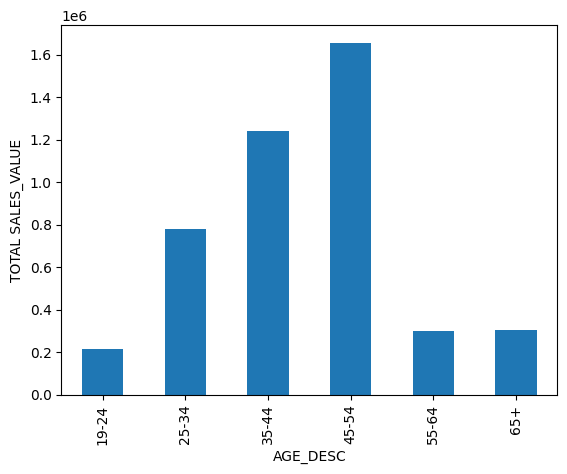

In [ ]:
df_age = df_cleaned.groupby('AGE_DESC')['SALES_VALUE'].sum()
df_age.plot(kind='bar', x='AGE_DESC', y='SALES_VALUE')
plt.xlabel('AGE_DESC')  # x축 레이블 추가
plt.ylabel('TOTAL SALES_VALUE')  # y축 레이블 추가
plt.show()

# 회귀분석 (Regression Analysis)

## 데이터 준비

In [ ]:
grouped = df_cleaned.groupby('household_key').agg(
    basket_id_count=('BASKET_ID', 'nunique'),
    product_id_count=('PRODUCT_ID', 'nunique'),
    sales_sum=('SALES_VALUE', 'sum'),
    age=('AGE_DESC2', 'first'),  # AGE 열에서 첫 번째 값을 사용
    marital=('MARITAL_STATUS_CODE2', 'first'),
    homeowner=('HOMEOWNER_DESC2', 'first'),
    income=('INCOME_DESCC2', 'first'),
    size =('HOUSEHOLD_SIZE_DESC2', 'first'),
    kid =('KID_CATEGORY_DESC2', 'first')).reset_index()


In [ ]:
grouped.describe()

,household_key,basket_id_count,product_id_count,sales_sum,age,marital,homeowner,income,size,kid
count,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00
mean,1235.18,174.83,876.81,5615.12,3.48,0.15,0.63,4.71,2.20,1.55
std,736.80,130.64,447.28,3750.94,1.28,0.35,0.48,2.26,1.19,0.96
min,1.00,22.00,162.00,646.40,1.00,0.00,0.00,1.00,1.00,1.00
25%,596.00,96.00,544.00,2970.10,3.00,0.00,0.00,3.00,1.00,1.00
50%,1218.00,139.00,800.00,4676.43,4.00,0.00,1.00,5.00,2.00,1.00
75%,1914.00,214.00,1099.00,7164.99,4.00,0.00,1.00,6.00,3.00,2.00
max,2499.00,1223.00,3112.00,27859.68,6.00,1.00,1.00,12.00,5.00,4.00


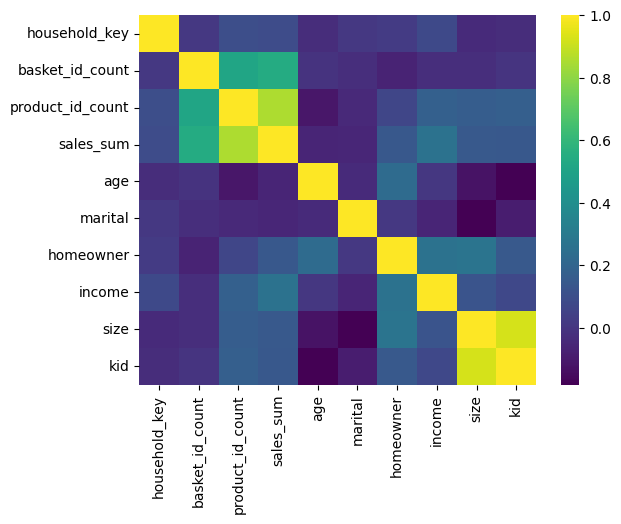

In [ ]:
corr = grouped.corr()
sns.heatmap(corr, cmap='viridis')
plt.show()

## statsmodels 이용

In [ ]:
import statsmodels.api as sm

y = grouped['sales_sum']

# 독립 변수
X = grouped[['basket_id_count', 'product_id_count', 'age', 'marital','homeowner','income','size', 'kid']]

X = sm.add_constant(X)  # OLS 분석을 위해 상수항을 만들어 주어야 함
reg = sm.OLS(y, X)    ## OLS:선형회귀, Logit: 로지스틱회귀
reg_fit = reg.fit()
print(reg_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              sales_sum   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     327.3
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          3.69e-245
Time:                        10:52:30   Log-Likelihood:                -7143.3
No. Observations:                 801   AIC:                         1.430e+04
Df Residuals:                     792   BIC:                         1.435e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1985.0014    295.690  

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
print(reg.exog_names)
pd.DataFrame({'독립변수': column, 'VIF': variance_inflation_factor(reg.exog, i)}
             for i, column in enumerate(reg.exog_names)
             if column != 'const')  # 절편의 VIF는 구하지 않는다.

['const', 'basket_id_count', 'product_id_count', 'age', 'marital', 'homeowner', 'income', 'size', 'kid']


,독립변수,VIF
0,basket_id_count,1.41
1,product_id_count,1.50
2,age,1.13
3,marital,1.11
4,homeowner,1.36
5,income,1.13
6,size,8.77
7,kid,8.12


In [ ]:
import statsmodels.api as sm

#y = grouped['sales_sum']
y2 = np.log(grouped['sales_sum'])
grouped['lnbasket_id_count'] = np.log(grouped['basket_id_count'])
grouped['lnproduct_id_count'] = np.log(grouped['product_id_count'])

# 독립 변수
X2 = grouped[[ 'lnbasket_id_count', 'lnproduct_id_count', 'age', 'marital','homeowner','income','size']]

X2 = sm.add_constant(X)  # OLS 분석을 위해 상수항을 만들어 주어야 함
reg = sm.OLS(y2, X2)    ## OLS:선형회귀, Logit: 로지스틱회귀
reg_fit = reg.fit()
print(reg_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              sales_sum   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     488.4
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          1.59e-282
Time:                        10:52:22   Log-Likelihood:                -119.71
No. Observations:                 801   AIC:                             255.4
Df Residuals:                     793   BIC:                             292.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8829      0

## sklearn 이용 (예측)

In [ ]:
# 학습 / 테스트데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [ ]:
# 독립변수 표준화

from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
s_scaler.fit_transform(X_train)
s_scaler.transform(X_test)

array([[ 0.  ,  0.33, -0.31, ...,  0.78, -0.78, -0.16],
       [ 0.  , -1.16, -0.29, ...,  0.78, -0.34, -0.16],
       [ 0.  , -0.29, -1.51, ...,  0.78, -0.78,  2.33],
       ...,
       [ 0.  ,  0.83,  0.52, ...,  0.78,  0.1 , -0.99],
       [ 0.  ,  0.75,  1.65, ...,  0.78,  1.42, -0.16],
       [ 0.  ,  0.61,  0.45, ...,  0.78,  0.54, -0.16]])

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_predict = lr_model.predict(X_test)

In [ ]:
train_performance = lr_model.score(X_train, y_train)
test_performance = lr_model.score(X_test, y_test)
#print("예측결과: \n", y_predict[0:10])
print("훈련 성능: {}   테스트 성능: {}".format(train_performance, test_performance))
print(X_train.columns)

np.set_printoptions(suppress=True, precision =2) #넘파이 결과가 지수형태로 나와서 보기 안좋아서 지수 제한
print("회귀식: {}  절편: {}".format(lr_model.coef_, lr_model.intercept_))

#독립변수가 종속변수의 변동을 66.9% 설명
#그러나, 머신러닝에서는 MAE, RMSE를 더 중요한 성능으로 고려함

훈련 성능: 0.8114107671425073   테스트 성능: 0.8104608616075202
Index(['const', 'lnbasket_id_count', 'lnproduct_id_count', 'age', 'marital',
       'homeowner', 'income', 'size'],
      dtype='object')
회귀식: [ 0.    0.22  0.95  0.01 -0.04  0.12  0.03 -0.02]  절편: 0.872467618636624


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#mean_absolute_error(실제, 예측)
print("MAE:", mean_absolute_error(y_test, y_predict ))
print("RMSE:", mean_squared_error(y_test, y_predict))

#MAE기준으로 해석하면, 회귀식이 평균적으로 예측한 값은 실제값과 약 $1335 정도 오차가 있음.

MAE: 0.22039398721804815
RMSE: 0.0827733631204086
